## Scientific Computing
### Assignment 5: singular value decomposition with cats

[Software, Data and
Technology](https://lp.jetbrains.com/software-data-and-technology-constructor-university/) bachelor program at [Constructor
University](https://constructor.university) (Bremen).

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd
import plotly.graph_objects as go

### Intro
In this assignment, you are allowed to use `scipy.linalg.svd`. You are not allowed to use any other functions from `scipy.linalg` unless it is explicitly mentioned in the task. You are allowed to use `for` loops if necessary, but are encouraged to use `numpy` vectorized operatorations instead where it is possible.

The assignment follows lectures of 2024-11-07 and 2024-11-08 closely. If you missed these lectures, it is recommended to watch them before doing the assignment.

### Task 0 (0 points)
Let us draw a cat. This task weights 0 points, so I provide my solution below. You can improve it by drawing a nicer cat, if you wish. It is important to keep the face as a circle. We will use this image later.

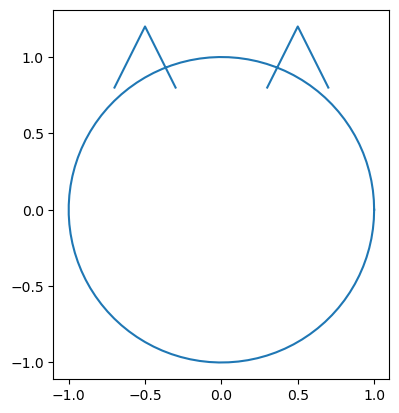

In [4]:
phi = np.linspace(0, 2 * np.pi, 100)
circle = np.array([np.cos(phi), np.sin(phi)])
circle = np.array([np.append(circle[0], np.nan), np.append(circle[1], np.nan)])
ear_left = np.array([[-0.3, -0.5, -0.7, np.nan], [0.8, 1.2, 0.8, np.nan]])
ear_right = np.array([[0.3, 0.5, 0.7, np.nan], [0.8, 1.2, 0.8, np.nan]])
cat = np.concatenate([circle, ear_left, ear_right], axis=1)
fig, ax = plt.subplots()
ax.plot(cat[0], cat[1])
ax.set_aspect("equal")

### Task 1 (1 point)
Write a function `visualize_operator_image(A, points)` that takes a square $2\times 2$ matrix $A$ and $2\times n_{points}$ matrix of points `points`, and plots the images of points in `points` under action of $A$. On the same figure, draw eigenvectors of matrix $AA^T$ (draw them as arrows starting at the origin, use `plt.arrow`; to find eigenvectors of a matrix, use `scipy.linalg.eig`). 

Apply this function to an image of a cat from Task 0 and a matrix `np.array([[1, 1], [0, 1]])`. Try to change the matrix and see what happens. What happens when your matrix becomes degenerate?

If everything is done correctly, the eigenvectors should have the same direction as the axes of the ellips that is an image of the cat's face. Lecture of 2024-11-07 explains why.


In [ ]:
# YOUR CODE HERE

### Task 2 (2 points + 1 bonus point)
Write a function `visualize_svd2x2(A, points)` that takes a square $2×2$ matrix $A$ and $2×n_{points}$ matrix of points `points` and visualizes how different elements of SVD decomposition act on `points`, in the following way.

Let us decompose `A` as $A=U\Sigma V^T$. Use `scipy.linalg.svd` to get the decomposition.

We will draw a picture that consists of four panes, two rows and two columns. On the top left pane, draw the original `points`. On the bottom left pane, draw the image of `points` under action of $V^T$. On the bottom right pane, draw the image of `points` under action of $\Sigma V^T$. Finally, on the right top pane, draw the image of `points` under action of $U \Sigma V^T$, and under $A$ (using different color and dashed line or markers). Two images on the right bottom pane should coincide.

Make sure to keep equal aspect ratio on all panes (you can use `ax.set_aspect("equal")` to do so) and adjust `xlim` and `ylim` so that all panes have the same scale.

Here is an example on how to create 2×2 layout:

    fig, axes = plt.subplots(2, 2)
    axes[0, 0].plot([0, 1, 0], [1, 0, 1])
    axes[1, 1].plot([0, 1, 2], [2, 3, 1])

Use your function and an image of a `cat` from Task 0 to visualize SVD decompositions of the following matrices:

$$\begin{pmatrix}1 & 1\\ 0 & 1\end{pmatrix},\quad \begin{pmatrix}2 & 0\\ 0 & 0.5\end{pmatrix}, \quad \begin{pmatrix}1 & 1 \\ 1 & 1\end{pmatrix},$$

and a couple of your favourite matrices.

**(Bonus)** Start with the identity matrix, then change it slowly and check which components of SVD decomposition depend continuosly on the matrix. Why?

In [163]:
# YOUR CODE HERE

In [ ]:
visualize_svd2x2(np.array([[1, 1], [1, 1]]), cat)

### Task 3 (2 points)
Write a function `visualize_svd2x2_multicolor(A, images)` that works just like `visualize_svd2x2`, but now accepts a list `images` of $2\times n_{points}$ arrays and draw each image with its own color. It is okay to use `for` loop here.

Use this function to make the following visualization. Take any *degenerate* non-zero $2\times 2$ matrix $A$. It has one-dimensional kernel (why one-dimensional?). Find some unit-lenght vector that belongs to the kernel. Denote this vector by $v_0$. Find another unit-lenght vector that is perpendicular to $v_0$. Denote this vector as $v_0^\perp$.

For each $t \in \texttt{np.linspace(-1, 1, 11)}$, consider a set $K(t) := \{t v_0^\perp + s v_0\mid s\in \texttt{np.linspace(-1, 1, 51)}\}$. I want to draw these sets, each with its own color, and their respective images under action of $V^T$, $\Sigma V^T$ and $U \Sigma V^T$. (To draw a single point, one can use something like `ax.plot([x], [y], 'o', color='C3')`)

Describe what happens with each of these sets under action of each of these maps? What happens with the set $\{K(t) \mid t \in \texttt{np.linspace(-1, 1, 11)}\}$ as a whole?

In [ ]:
# YOUR CODE HERE

### Task 4 (3 points)
Let us consider 3×3 matrix of rank 2 denoted by $A$. For example,

```
A = np.array([[1, 0, 1], [0, 1, 2], [1, 1, 3]])
```

I want to draw a figure that consists of four panels, with the same meaning as in Tasks 2 and 3. Now our map acts from three-dimensional space to three-dimensional space and we will use `plotly` to draw 3-dimensional plots.

As previously, decompose $A=U\Sigma V^T$.

This time we will start from left bottom panel. I want to draw there a 3D scatter plot of the following set: $K' := \{(c_x, c_y, t)\mid (c_x, c_y) \in \texttt{cat}, t \in \texttt{np.linspace(-1, 1, 31)}\}$, where `cat` is a set of points defined in Task 0.

On the left top panel, draw a set $K=VK'$ (i.e. a set $\{Vk'\mid k'\in K'\}$)

On the right bottom, draw a set $\Sigma K'=\Sigma V^T K$.

On the right top panel, draw a set $U \Sigma K'$. Make sure that the result is the same as $AK$.

Describe what happens as you unroll the expansion $A=U\Sigma V^T$ by going from left top panel down, then right, then up.

What changes if matrix $A$ would have rank 1 instead of 2?

**Hint.** Below is the example of plotting 3D scatters with plotly.

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=2, 
    cols=2, 
    start_cell="bottom-left",
    specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}],
           [{'type': 'scatter3d'}, {'type': 'scatter3d'}]]
)

fig.add_trace(
    go.Scatter3d(x=[1, 2, 30], y=[4, 5, 6], z=[9, 8, 9]), row=1, col=1
)

fig.add_trace(
    go.Scatter3d(x=[20, 30, 40], y=[50, 60, 70], z=[50, 6, 90]), row=1, col=2
)

fig.add_trace(
    go.Scatter3d(x=[300, 400, 500], y=[600, 70, 800], z=[100, 900, 1200]),
    row=2,
    col=1,
)

fig.add_trace(
    go.Scatter3d(
        x=[4000, 5000, 6000], y=[7000, 8000, 9000], z=[1000, 1100, 12000]
    ),
    row=2,
    col=2,
)

In [ ]:
# YOUR CODE HERE

### Task 5 (2 points)
Consider nonzero
a) $1\times 2$ matrix;
b) $2\times 1$ matrix $A$. Find analytically its SVD decomposition. Check your solution by choosing arbitrary matrix $A$ and using `scipy.linalg.svd`. Explain what happens at each step of the decomposition, like you did at the previous tasks.

*Please, write your solution here*

### Task 6 (2 points)
Write a function `get_distance_to_image(A, b)` that takes arbitrary rectangular matrix $A$ and point $b$ and finds the distance between point $b$ and the image of operator $A$. 


**Remark.** If $A$ is not full rank, it means that some of the singular values in SVD decomposition are zeros. Due to numerical errors, it is possible that `scipy.linalg.svd` return non-zero, but small singular values instead. In this problem, we treat all singular values that are smaller than $10^{-15}$ as zeros.

**Hint.** This problem can be easily solved by looking at the right bottom panel of the figures you plotted in tasks 2-5.

In [181]:
# YOUR CODE HERE

### Task 7 (2 points)
Consider a linear system $Ax=b$ for some rectangular $n×m$ matrix $A$, $b \in \mathbb R^m$. Let $b'\in \mathbb R^m$ be such a vector that $Ax=b'$ has solution and distance between $b'$ and $b$ is minimal. Write a function `solve(A, b)` that returns a $k\times m$ array whose rows are solutions $x_0, \ldots, x_{k-1} \in \mathbb R^m$ of $Ax=b'$. It is required that system of $(k-1)$ vectors $\{x_1 - x_0, \ldots , x_{k-1} - x_{0}\}$ be linearly independent, and $k$ be as large as possible.

**Hint.** Use pseudoinverse to find one solution of equation $Ax=b'$. (The notion of pseudoinverse was discussed at the lecture 2024-11-08.) Then recall how to find all solutions of non-homogeneous linear system provided that you know one solution. Use SVD decomposition to find pseudoinverse. Use SVD decomposition to find rank and kernel of $A$. As in the previous problem, assume that singular values that are smaller than $10^{-15}$ are zeros.

In [180]:
# YOUR CODE HERE